In [78]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import cv2
import numpy as np
import skimage.io as skio
import os

root_path = r'/data/sunrui/celldata/20230803-2_HBEC_Yoko_Lib5_G+R-_DL/20230803_B11_F0009/'
# file_name = r'10%Laser_300ms_2x2bin.tif'

# 读取一系列图像
raw_path = root_path + '/01_GT/SAMSEG/'  # 原始图像路径
imgfiles = [os.path.join(raw_path, f) for f in os.listdir(raw_path) if f.endswith('.tif') or f.endswith('.tiff')]
imgfiles.sort()

img_raw = []

print(len(imgfiles))
for i in range(len(imgfiles)):
    img_raw.append(skio.imread(imgfiles[i]).astype(np.uint16))
print(len(img_raw))
img_raw = np.array(img_raw)
print(img_raw.shape)

# 创建与图像序列大小相同的空白图像
img_post = np.zeros(img_raw.shape, dtype=np.uint8)
print(img_post.shape)

# 遍历图像序列
for i in range(img_raw.shape[0]):
    image = img_raw[i, :, :, 0]

    # 获取图像的最小灰度值和最大灰度值
    min_intensity = np.min(image)
    max_intensity = np.max(image)

    # 遍历灰度值范围
    for intensity in range(min_intensity, max_intensity + 1):
        # 创建一个与原始图像大小相同的空白图像
        gray_value_image = (image == intensity).astype('uint8') * 255

        # 定义结构元素（这里使用3x3的正方形结构元素）
        structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

        # 进行腐蚀操作
        eroded_image_0 = cv2.erode(gray_value_image, structuring_element)
        eroded_image_1 = cv2.erode(eroded_image_0, structuring_element)
        # 进行膨胀操作
        dilated_image_0 = cv2.dilate(eroded_image_1, structuring_element)
        dilated_image_1 = cv2.dilate(dilated_image_0, structuring_element)

        # 计算非零像素的数量（PRE）
        non_zero_pixels_pre = np.count_nonzero(gray_value_image)
        # print('pre:')
        # print(non_zero_pixels_pre)

        # 计算非零像素的数量（POST）
        non_zero_pixels_post = np.count_nonzero(dilated_image_1)
        # print('post:')
        # print(non_zero_pixels_post)

        # 结果
        post_result = (dilated_image_1 / 255) * intensity
        post_result = post_result.astype('uint8')
        ss = np.max(post_result)
        # print('label:')
        # print(ss)
        # print('...................................................')

        # 更新img_post
        if non_zero_pixels_post > 850:
            img_post[i, :, :, 0] += post_result


347
347
(347, 1000, 1000, 1)
(347, 1000, 1000, 1)


In [79]:
print(img_post.shape)
print(img_post.dtype)
img_post_16 = img_post.astype(np.uint16)

(347, 1000, 1000, 1)
uint8


In [80]:
print(np.max(img_post_16))
print(np.mean(img_post_16))
print(np.min(img_post_16))

61
1.7410211873198846
0


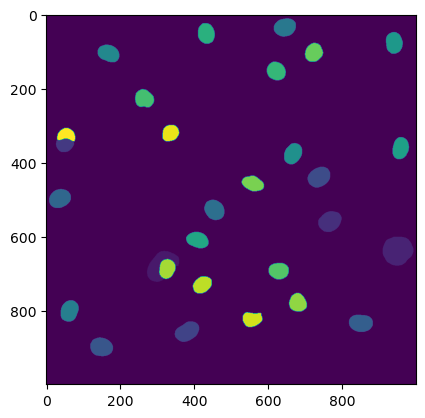

In [81]:
import skimage.io as skio
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
image_folder =root_path + r'/01_GT/SEG_16/'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

for i in range(img_post.shape[0]):
    image_path = os.path.join(image_folder, f'man_seg{i:03d}.tif')
    imwrite(image_path,img_post_16[i,:,:,0])


plt.imshow(img_post_16[14,:,:,0])
plt.show()

In [82]:
# import skimage.io as skio
# from tifffile import imread, imwrite
# import matplotlib.pyplot as plt
# image_folder =root_path + r'/01_GT/SEG_8/'
# if not os.path.exists(image_folder):
#     os.makedirs(image_folder)

# for i in range(img_post.shape[0]):
#     image_path = os.path.join(image_folder, f'man_seg{i:03d}.tif')
#     imwrite(image_path,img_post[i,:,:,0])


# plt.imshow(img_post[14,:,:,0])
# plt.show()

In [83]:
# plt.imshow(img_post[14,:,:,0])
# plt.show()

In [84]:
# import cv2
# import numpy as np
# import skimage.io as skio
# from tifffile import imread, imwrite
# import matplotlib.pyplot as plt
# import os

# root_path = r'/data/sunrui/celldata/r03c03f01/'
# file_name = r'r03c03f01.tif'

# #读取一系列图像
# raw_path = root_path + '/01_GT/SAMSEG/'#原始图像路径
# imgfiles = [os.path.join(raw_path, f) for f in os.listdir(raw_path) if f.endswith('.tif') or f.endswith('.tiff')]
# imgfiles.sort()

# img_raw = []

# print(len(imgfiles))
# for i in range(len(imgfiles)):
#     img_raw.append(skio.imread(imgfiles[i]).astype(np.uint16))
# print(len(img_raw))
# img_raw = np.array(img_raw)
# print(img_raw.shape)

# img_post = np.zeros(img_raw.shape, dtype= np.uint8)
# print(img_post.shape)

# image = img_raw[0,:,:,0]
# image_post = img_post[0,:,:,0]
# # 读取灰度图像
# # image = cv2.imread("gray_image.jpg", cv2.IMREAD_GRAYSCALE)

# # 获取图像的最小灰度值和最大灰度值
# min_intensity = np.min(image)
# max_intensity = np.max(image)

# # 设置图像框的大小
# figure_size = (20, 20)  # 设置为(宽度, 高度)

# # image_post = np.zeros(image.shape, dtype = np.uint8)

# # 遍历灰度值范围
# for intensity in range(min_intensity, max_intensity + 1):
#     # 创建一个与原始图像大小相同的空白图像
#     gray_value_image = (image == intensity).astype('uint8') * 255

#     # 定义结构元素（这里使用3x3的正方形结构元素）
#     structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

#     # 进行腐蚀操作
#     eroded_image_0 = cv2.erode(gray_value_image, structuring_element)
#     eroded_image_1 = cv2.erode(eroded_image_0, structuring_element)
#     # 进行膨胀操作
#     dilated_image_0 = cv2.dilate(eroded_image_1, structuring_element)
#     dilated_image_1 = cv2.dilate(dilated_image_0, structuring_element)

#     # 计算非零像素的数量(PRE)
#     non_zero_pixels_pre = np.count_nonzero(gray_value_image)
#     print('pre:')
#     print(non_zero_pixels_pre)

#     # 计算非零像素的数量(POST)
#     non_zero_pixels_post = np.count_nonzero(dilated_image_1)
#     print('post:')
#     print(non_zero_pixels_post)

#     #结果
#     post_result = (dilated_image_1/255)*intensity
#     post_result = post_result.astype('uint8')
#     ss = np.max(post_result)
#     print('label:')
#     print(ss)
#     print('...................................................')


#     if non_zero_pixels_post > 1000:
#         image_post += post_result

#     # # 设置图像框的大小
#     # plt.figure(figsize=figure_size)

#     # # 显示当前灰度值图像
#     # plt.subplot(121)
#     # plt.imshow(gray_value_image, cmap='gray')
#     # plt.axis('off')
#     # plt.title("Original Image")

#     # # 显示腐蚀和膨胀后的图像
#     # plt.subplot(122)
#     # plt.imshow(dilated_image_1, cmap='gray')
#     # plt.axis('off')
#     # plt.title("Eroded Image")

#     # plt.show()
# # img_post[0,:,:,0] = image_post